In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import math

In [2]:
JPY = pd.read_csv('USD_JPY.csv', sep=';')
RUB = pd.read_csv('USD_RUB.csv', sep=';')

In [3]:
def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

In [4]:
dataset = JPY['Макс'].values
dataset = dataset.astype('float32')

# split into train and test sets
inputs = rolling_window(dataset,3)
n = len(dataset)-3
inputs = inputs[:n]
targets = dataset[3:]
x_train, x_test, y_train, y_test = train_test_split(inputs, targets,
                                                    test_size=0.33,
                                                    random_state=0)

In [22]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(2, input_dim=3, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
220/220 [==============================] - 0s 2ms/step - loss: 747.9720
Epoch 2/200
220/220 [==============================] - 0s 1ms/step - loss: 0.1362
Epoch 3/200
220/220 [==============================] - 0s 1ms/step - loss: 0.1265
Epoch 4/200
220/220 [==============================] - 0s 1ms/step - loss: 0.1280
Epoch 5/200
220/220 [==============================] - 0s 1ms/step - loss: 0.1292
Epoch 6/200
220/220 [==============================] - 0s 1ms/step - loss: 0.1279
Epoch 7/200
220/220 [==============================] - 0s 1ms/step - loss: 0.1282
Epoch 8/200
220/220 [==============================] - 0s 1ms/step - loss: 0.1314
Epoch 9/200
220/220 [==============================] - 0s 1ms/step - loss: 0.1363
Epoch 10/200
220/220 [==============================] - 0s 1ms/step - loss: 0.1292
Epoch 11/200
220/220 [==============================] - 0s 1ms/step - loss: 0.1323
Epoch 12/200
220/220 [==============================] - 0s 1ms/step - loss: 0.1312
Epoch 13/20

220/220 [==============================] - 0s 1ms/step - loss: 0.2093
Epoch 197/200
220/220 [==============================] - 0s 1ms/step - loss: 0.1833
Epoch 198/200
220/220 [==============================] - 0s 1ms/step - loss: 0.2700
Epoch 199/200
220/220 [==============================] - 0s 1ms/step - loss: 0.1793
Epoch 200/200
220/220 [==============================] - 0s 1ms/step - loss: 0.1964


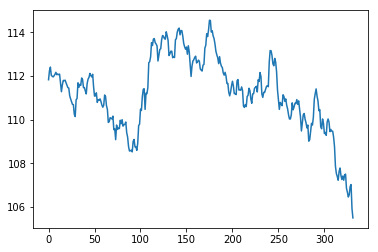

In [24]:
plt.plot(dataset)
plt.show()

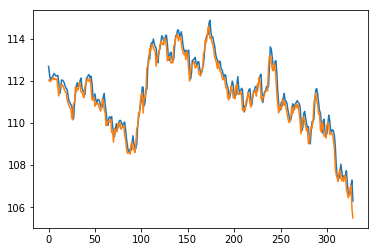

In [32]:
plt.plot(model.predict(inputs))
plt.plot(targets)
plt.show()